In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

f:\python-3.6\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Reading the csv file
df = pd.read_csv("IOT-temp.csv")
# Printing the first 5 entries in the Dataframe
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [3]:
# Getting the number of rows and columns
df.shape

(97606, 5)

In [4]:
# Information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [5]:
# Getting the unique values from the id columns
unique_id = df['id'].unique()
print(len(unique_id))

97605


In [6]:
unique_room_id = df['room_id/id'].unique()
print(unique_room_id)

['Room Admin']


In [7]:
df.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [8]:
#Getting the userful data into the "data" dataframe
data = df.iloc[:,3:]
data.head()

,temp,out/in
0,29,In
1,29,In
2,41,Out
3,41,Out
4,31,In


In [9]:
#We can't work with text data so we encode it to get it in integer format
#Here '0' means 'in' and '1' means 'out'.
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()
data['out/in'] = lec.fit_transform(data['out/in'])
data.head()

,temp,out/in
0,29,0
1,29,0
2,41,1
3,41,1
4,31,0


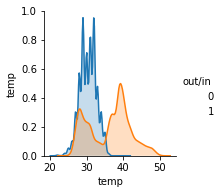

In [10]:
import seaborn as sns
sns.pairplot(data = data , hue = 'out/in')

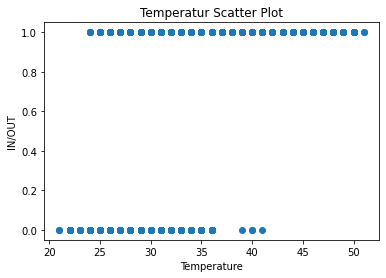

In [11]:
import matplotlib.pyplot as plt
plt.scatter(data['temp'],data['out/in'])
plt.title('Temperatur Scatter Plot')
plt.xlabel('Temperature')
plt.ylabel('IN/OUT')
plt.show()

In [12]:
#Converting the data into numpy array

X = data['temp'].values
print(X[0:5])

[29 29 41 41 31]


In [13]:
Y = data['out/in'].values
print(Y[0:5])

[0 0 1 1 0]


In [14]:
X = X.reshape(-1,1)
X.shape

(97606, 1)

As their is a diversity between input and output variables or we can say

dependent and independent variables, we standardize the data to get better results

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X)
X = sc.transform(X)
print(X[0:5])

[[-1.06213116]
 [-1.06213116]
 [ 1.04320729]
 [ 1.04320729]
 [-0.71124142]]


In [16]:
from sklearn.model_selection import train_test_split
X_train , x_test , Y_train , y_test = train_test_split(X,Y,test_size = 0.3)
print(X_train[0:5])

[[ 1.5695419 ]
 [-0.71124142]
 [ 0.51687268]
 [ 0.86776242]
 [ 2.09587652]]


In [17]:
print(len(X_train))

68324


I know that the data is not large, but the data has some temp reading

that are corresponding to both in and out, so to split them, we have to

introduce a kernel for that we use SVM.

In [18]:
from sklearn.svm import SVC
classifier2 = SVC(gamma = 'auto')
classifier2.fit(X_train,Y_train)

SVC(gamma='auto')

Cross Validating the SVM classifier on different distributions of data

In [19]:
y_pred_classifier2 = classifier2.predict(x_test)
from sklearn.metrics import accuracy_score ,confusion_matrix
accuracy_score(y_pred_classifier2,y_test)

0.8016528925619835

In [20]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classifier2))

Confusion Matrix:
[[ 2862  3136]
 [ 2672 20612]]


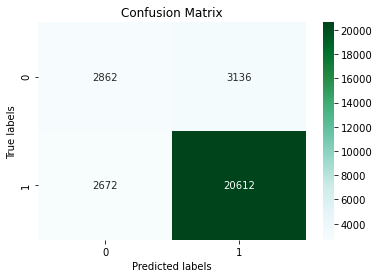

In [21]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_classifier2), annot=True, ax = ax, cmap = "BuGn",fmt='d');

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
